In [2]:
# import libraries
import pandas as pd                      # for data wrangling
import geopandas as gpd                  # for analyzing spatial data
import contextily as ctx                 # for base maps
import matplotlib.pyplot as plt          # for plotting data
import plotly.express as px              # for interactive plots
import folium   # for interactive maps

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
# import median household income geojson data from censusreporter
hhinc = gpd.read_file('acs2019_5yr_B19013_14000US06037222001.geojson')

In [4]:
hhinc.columns = ['geoid', 'name', 'Median Household Income', 'Margin of Error', 'geometry']

In [5]:
hhinc.tail()

,geoid,name,Median Household Income,Margin of Error,geometry
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",62142.0,452.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


In [6]:
hhinc = hhinc.drop([1004])
hhinc.tail()

,geoid,name,Median Household Income,Margin of Error,geometry
999,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",150250.0,13582.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


In [7]:
hhinc_mercator = hhinc.to_crs(epsg=3857)

In [8]:
parks = gpd.read_file("https://data.lacity.org/api/geospatial/rwq7-yhp5?method=export&format=GeoJSON")

In [9]:
parks_mercator = parks.to_crs(epsg=3857)

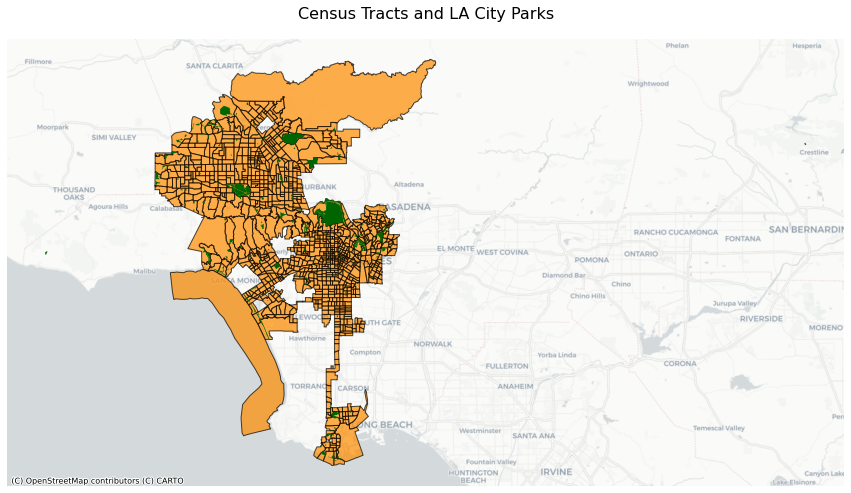

In [10]:
fig, ax = plt.subplots(figsize=(15,15))

# add the layer with ax=ax in the argument 
hhinc_mercator.plot(ax=ax,
                color="darkorange",
                alpha=0.7,
                edgecolor="black"
               )
# add the layer with ax=ax in the argument 
parks_mercator.plot(ax=ax,
                    color="darkgreen",
                    alpha=1
                   )

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts and LA City Parks',fontsize=16,pad=20)

# add a basemap
ctx.add_basemap (ax,source=ctx.providers.CartoDB.Positron)

In [11]:
parks_clip = gpd.clip(parks_mercator, hhinc_mercator, keep_geom_type=True)

In [12]:
parks_clip.head()

,name,shape_area,objectid,park_id,name_alpha,shape_leng,area_acres,issubpark,region,address,name_publi,park_class,cd_real,geometry
0,Robert F Kennedy Inspiration Memorial Park,6501.37488025,1,1056,ROBERT F KENNEDY PARK (LAUSD) JUA,641.47054538,0.149251627315,N,M,"3400 W Wilshire Blvd, LA 90010",Kennedy (Robert F) Inspiration Memorial Park (...,N,10,"POLYGON ((-13168758.184 4037079.620, -13168758..."
1,Sycamore Grove Park,691462.199493,2,736,SYCAMORE GROVE PARK,6227.3991903,15.8738513625,N,M,"4702 N Figueroa St, LA 90042",Sycamore Grove Park,C,01,"POLYGON ((-13158086.106 4042389.783, -13158073..."
2,San Pedro Welcome Park,17402.1579777,3,328,SAN PEDRO WELCOME PARK,560.372862441,0.399500174163,N,P,"451 N Gaffey St, San Pedro 90731",Formerly Welcome Park,N,15,"POLYGON ((-13168300.614 3994761.287, -13168294..."
3,Country Club Heritage Park,3647.84860118,4,1045,COUNTRY CLUB PARK HERITAGE PLAZA,287.523337381,0.0837434158085,N,M,"1015 S Wilton Pl, LA 90018",AKA Wilton Place Park,N,10,"POLYGON ((-13170762.690 4035838.520, -13170762..."
4,Watts Cultural Crescent,128793.355722,5,1046,WATTS CULTURAL CRESCENT,2852.11033344,2.95670043382,N,P,"1780 E Santa Ana Blvd, LA 90002",AKA Watts Towers Cultural Cresent,N,15,"POLYGON ((-13162666.621 4020677.766, -13162671..."


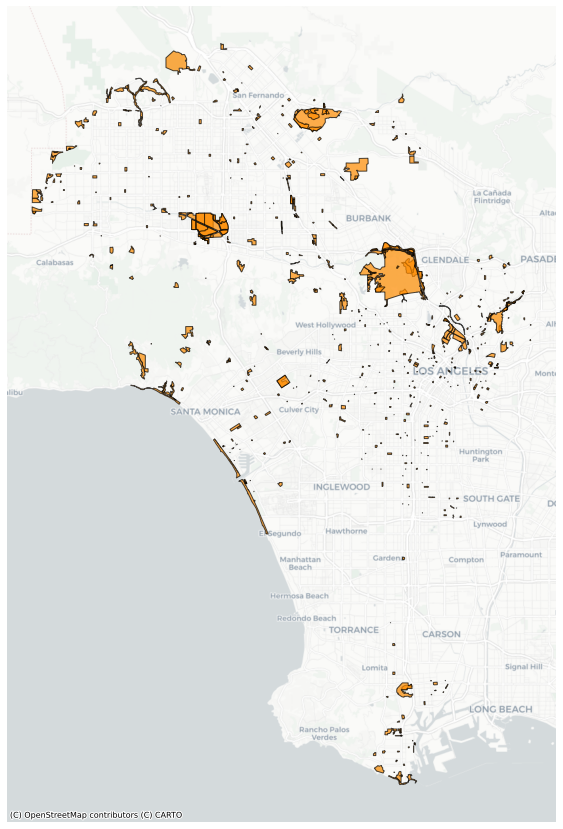

In [13]:
fig, ax = plt.subplots(figsize=(15,15))

# add the layer with ax=ax in the argument 
parks_clip.plot(ax=ax,
                color="darkorange",
                alpha=0.7,
                edgecolor="black"
               )

# turn the axis off
ax.axis('off')

# add a basemap
ctx.add_basemap (ax,source=ctx.providers.CartoDB.Positron)

In [14]:
hhinc.head()

,geoid,name,Median Household Income,Margin of Error,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,16806.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,11857.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [56]:
nhcity = gpd.read_file("https://s3-us-west-2.amazonaws.com/mappingla.com/downloads/neighborhoods/la_city.json")

In [57]:
nhcounty = gpd.read_file("https://usc.data.socrata.com/api/geospatial/r8qd-yxsr?method=export&format=GeoJSON")

In [58]:
nh_clip = gpd.clip(nhcity, nhcounty, keep_geom_type=True)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

<AxesSubplot:>

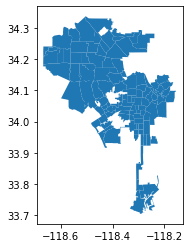

In [59]:
nh_clip.plot()

In [60]:
nh_clip.head()

,name,slug,geometry
0,Adams-Normandie,adams-normandie,"POLYGON ((-118.30571 34.03731, -118.30151 34.0..."
1,Arleta,arleta,"MULTIPOLYGON (((-118.42281 34.22170, -118.4242..."
2,Arlington Heights,arlington-heights,"POLYGON ((-118.31591 34.05261, -118.31591 34.0..."
3,Atwater Village,atwater-village,"POLYGON ((-118.27832 34.15300, -118.27805 34.1..."
4,Baldwin Hills/Crenshaw,baldwin-hillscrenshaw,GEOMETRYCOLLECTION (POLYGON ((-118.35501 34.02...


In [61]:
nhcounty.head()

,external_i,name,location,latitude,slug_1,sqmi,display_na,set,slug,longitude,name_1,kind,type,geometry
0,acton,Acton,POINT(34.497355239240846 -118.16981019229348),-118.16981019229348,None,39.3391089485,Acton L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),acton,34.497355239240846,None,L.A. County Neighborhood (Current),unincorporated-area,"MULTIPOLYGON (((-118.20262 34.53899, -118.1894..."
1,adams-normandie,Adams-Normandie,POINT(34.031461499124156 -118.30020800000011),-118.30020800000011,None,0.805350187789,Adams-Normandie L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),adams-normandie,34.031461499124156,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-118.30901 34.03741, -118.3004..."
2,agoura-hills,Agoura Hills,POINT(34.146736499122795 -118.75988450000015),-118.75988450000015,None,8.14676029818,Agoura Hills L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),agoura-hills,34.146736499122795,None,L.A. County Neighborhood (Current),standalone-city,"MULTIPOLYGON (((-118.76193 34.16820, -118.7263..."
3,agua-dulce,Agua Dulce,POINT(34.504926999796837 -118.3171036690717),-118.3171036690717,None,31.4626319451,Agua Dulce L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),agua-dulce,34.504926999796837,None,L.A. County Neighborhood (Current),unincorporated-area,"MULTIPOLYGON (((-118.25468 34.55830, -118.2555..."
4,alhambra,Alhambra,POINT(34.085538999123571 -118.13651200000021),-118.13651200000021,None,7.62381430605,Alhambra L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),alhambra,34.085538999123571,None,L.A. County Neighborhood (Current),standalone-city,"MULTIPOLYGON (((-118.12175 34.10504, -118.1168..."


In [62]:
nhcity.head()

,name,slug,geometry
0,Adams-Normandie,adams-normandie,"MULTIPOLYGON (((-118.30901 34.03741, -118.3057..."
1,Arleta,arleta,"MULTIPOLYGON (((-118.42202 34.22410, -118.4228..."
2,Arlington Heights,arlington-heights,"MULTIPOLYGON (((-118.31591 34.05261, -118.3155..."
3,Atwater Village,atwater-village,"MULTIPOLYGON (((-118.27832 34.15301, -118.2783..."
4,Baldwin Hills/Crenshaw,baldwin-hillscrenshaw,"MULTIPOLYGON (((-118.35626 34.02484, -118.3550..."


In [45]:
nhcity.shape

(114, 3)

In [47]:
nh_clip.shape

(114, 3)